In [ ]:
import pandas as pd

# Load from CSV file
df = pd.read_csv('Customer_Sentiment[1].csv')

In [ ]:
# Get a quick peek at the data
print("\n--- First few rows ---")
print(df.head())


--- First few rows ---
   customer_id  gender age_group   region product_category purchase_channel  \
0            1    male       60+    north       automobile           online   
1            2   other     46-60  central            books           online   
2            3  female     36-45     east           sports           online   
3            4  female     18-25  central        groceries           online   
4            5  female     18-25     east      electronics           online   

               platform  customer_rating  \
0              flipkart                1   
1      swiggy instamart                5   
2  facebook marketplace                1   
3                 zepto                2   
4                 croma                3   

                               review_text sentiment  response_time_hours  \
0      very disappointed with the quality.  negative                   46   
1       fast delivery and great packaging.  positive                    5   
2    

In [ ]:
# Dimensions of the dataset
print(f"\nTotal rows: {df.shape[0]}, Total columns: {df.shape[1]}")


Total rows: 25000, Total columns: 13


In [ ]:
# Column names and data types
print("\nColumns and types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")



Columns and types:
customer_id: int64
gender: object
age_group: object
region: object
product_category: object
purchase_channel: object
platform: object
customer_rating: int64
review_text: object
sentiment: object
response_time_hours: int64
issue_resolved: object
complaint_registered: object


In [ ]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customer_id             0
gender                  0
age_group               0
region                  0
product_category        0
purchase_channel        0
platform                0
customer_rating         0
review_text             0
sentiment               0
response_time_hours     0
issue_resolved          0
complaint_registered    0
dtype: int64


In [ ]:
# Quick stats for numeric fields (like rating, response time)
print("\nSummary stats (selected numeric columns):")
print(df[['customer_rating', 'response_time_hours']].describe())


Summary stats (selected numeric columns):
       customer_rating  response_time_hours
count     25000.000000         25000.000000
mean          3.002480            36.023480
std           1.404647            20.597941
min           1.000000             1.000000
25%           2.000000            18.000000
50%           3.000000            36.000000
75%           4.000000            54.000000
max           5.000000            71.000000


In [ ]:
# List unique entries for key categorical features
cat_cols = ['gender', 'age_group', 'region', 'product_category', 'purchase_channel', 'platform', 'sentiment', 'issue_resolved', 'complaint_registered']
print("\nUnique values in important categorical columns:")
for col in cat_cols:
    vals = df[col].unique()
    print(f"{col}: {vals}")


Unique values in important categorical columns:
gender: ['male' 'other' 'female']
age_group: ['60+' '46-60' '36-45' '18-25' '26-35']
region: ['north' 'central' 'east' 'south' 'west']
product_category: ['automobile' 'books' 'sports' 'groceries' 'electronics' 'travel'
 'fashion' 'home & kitchen' 'beauty']
purchase_channel: ['online']
platform: ['flipkart' 'swiggy instamart' 'facebook marketplace' 'zepto' 'croma'
 'amazon' 'shopclues' 'tata cliq' 'snapdeal' 'paytm mall' 'ajio' 'myntra'
 'nykaa' 'reliance digital' 'meesho' 'bigbasket' 'lenskart' 'jiomart'
 'others' 'boat']
sentiment: ['negative' 'positive' 'neutral']
issue_resolved: ['yes' 'no']
complaint_registered: ['yes' 'no']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

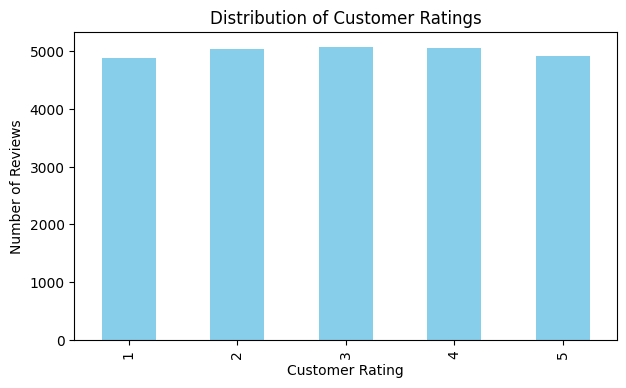

In [ ]:
# Assuming 'df' is your DataFrame

# 1. Ratings distribution
plt.figure(figsize=(7,4))
df['customer_rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()


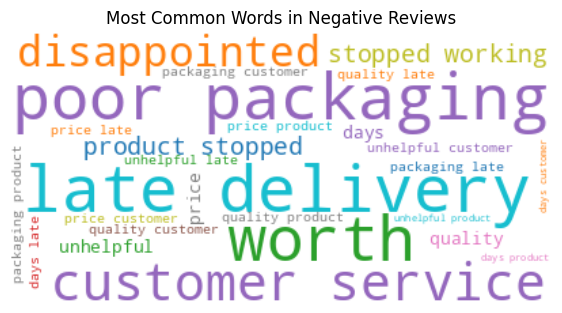

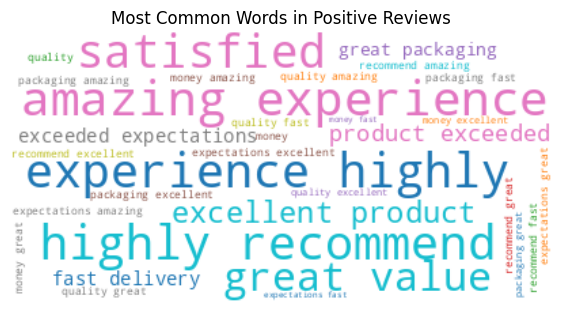

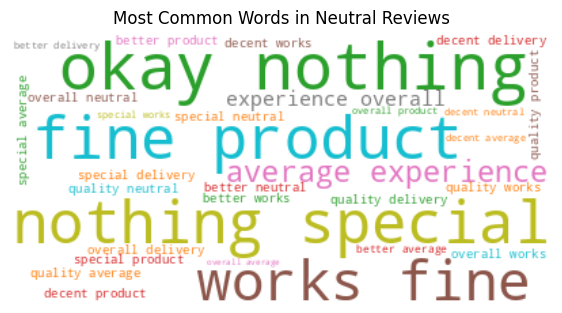

In [ ]:
# 2. WordCloud for each sentiment
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['review_text'])
    wc = WordCloud(background_color='white', max_words=100, colormap='tab10').generate(text)
    plt.figure(figsize=(7,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {sentiment.capitalize()} Reviews')
    plt.show()

In [ ]:
import pandas as pd

# Mean response time by sentiment
sentiment_mean_response = df.groupby('sentiment')['response_time_hours'].mean()
print("\nMean response time by sentiment:")
print(sentiment_mean_response)


Mean response time by sentiment:
sentiment
negative    36.022240
neutral     36.086922
positive    35.992383
Name: response_time_hours, dtype: float64


In [ ]:

# Complaint percentage by platform
platform_complaint_pct = df.groupby('platform')['complaint_registered'].value_counts(normalize=True).unstack()['yes'] * 100
print("\nComplaint registration percentage by platform:")
print(platform_complaint_pct)



Complaint registration percentage by platform:
platform
ajio                    38.897893
amazon                  39.249147
bigbasket               41.463415
boat                    37.549722
croma                   41.548183
facebook marketplace    37.971698
flipkart                42.958861
jiomart                 39.112903
lenskart                39.645447
meesho                  39.677419
myntra                  38.437253
nykaa                   40.430438
others                  40.279938
paytm mall              39.260425
reliance digital        39.327600
shopclues               41.475410
snapdeal                41.582622
swiggy instamart        39.345638
tata cliq               38.134888
zepto                   38.497653
Name: yes, dtype: float64


In [ ]:
import pandas as pd

# Let's define platforms with highest complaint percentages
high_complaint_platforms = ['flipkart', 'shopclues', 'snapdeal', 'bigbasket', 'croma']


In [ ]:

# Filter your DataFrame
df_high_complaint = df[df['platform'].isin(high_complaint_platforms)]



In [ ]:
# Aggregate complaints by product category
complaints_by_category = df_high_complaint.groupby(['platform', 'product_category'])['complaint_registered'].value_counts(normalize=True).unstack()['yes'] * 100

print("Complaint registration percentage by product category for high-complaint platforms:")
print(complaints_by_category)



Complaint registration percentage by product category for high-complaint platforms:
platform   product_category
bigbasket  automobile          35.802469
           beauty              44.444444
           books               44.262295
           electronics         41.176471
           fashion             42.335766
           groceries           41.666667
           home & kitchen      45.517241
           sports              45.323741
           travel              33.587786
croma      automobile          42.253521
           beauty              33.593750
           books               46.794872
           electronics         41.911765
           fashion             46.153846
           groceries           37.878788
           home & kitchen      38.064516
           sports              44.137931
           travel              41.860465
flipkart   automobile          52.380952
           beauty              43.356643
           books               41.353383
           electronics     

In [ ]:
# Aggregate sentiment for these platforms
sentiments_by_platform = df_high_complaint.groupby(['platform', 'sentiment']).size().unstack().fillna(0)
print("\nSentiment counts by high-complaint platform:")
print(sentiments_by_platform)

# Optional: See most frequent bad-review product categories per platform
bad_review = df_high_complaint[df_high_complaint['sentiment'] == 'negative']
bad_review_counts = bad_review.groupby(['platform', 'product_category']).size().unstack().fillna(0)
print("\nNegative review counts by product category and platform:")
print(bad_review_counts)


Sentiment counts by high-complaint platform:
sentiment  negative  neutral  positive
platform                              
bigbasket       510      232       488
croma           526      254       486
flipkart        543      251       470
shopclues       506      240       474
snapdeal        536      243       510

Negative review counts by product category and platform:
product_category  automobile  beauty  books  electronics  fashion  groceries  \
platform                                                                       
bigbasket                 58      56     54           56       58         55   
croma                     60      43     73           57       66         50   
flipkart                  77      62     55           55       57         55   
shopclues                 46      46     61           48       66         62   
snapdeal                  61      64     57           62       64         47   

product_category  home & kitchen  sports  travel  
platform   


--- Flipkart | Automobile ---
1. very disappointed with the quality.
2. product stopped working after few days.
3. customer service was unhelpful.
4. customer service was unhelpful.
5. very disappointed with the quality.

--- Flipkart | Fashion ---
1. very disappointed with the quality.
2. very disappointed with the quality.
3. late delivery and poor packaging.
4. product stopped working after few days.
5. product stopped working after few days.

--- Flipkart | Books ---
1. late delivery and poor packaging.
2. late delivery and poor packaging.
3. very disappointed with the quality.
4. not worth the price.
5. not worth the price.

--- Flipkart | Home & Kitchen ---
1. late delivery and poor packaging.
2. product stopped working after few days.
3. not worth the price.
4. not worth the price.
5. not worth the price.

--- Flipkart | Sports ---
1. very disappointed with the quality.
2. product stopped working after few days.
3. not worth the price.
4. very disappointed with the quality.
5. 

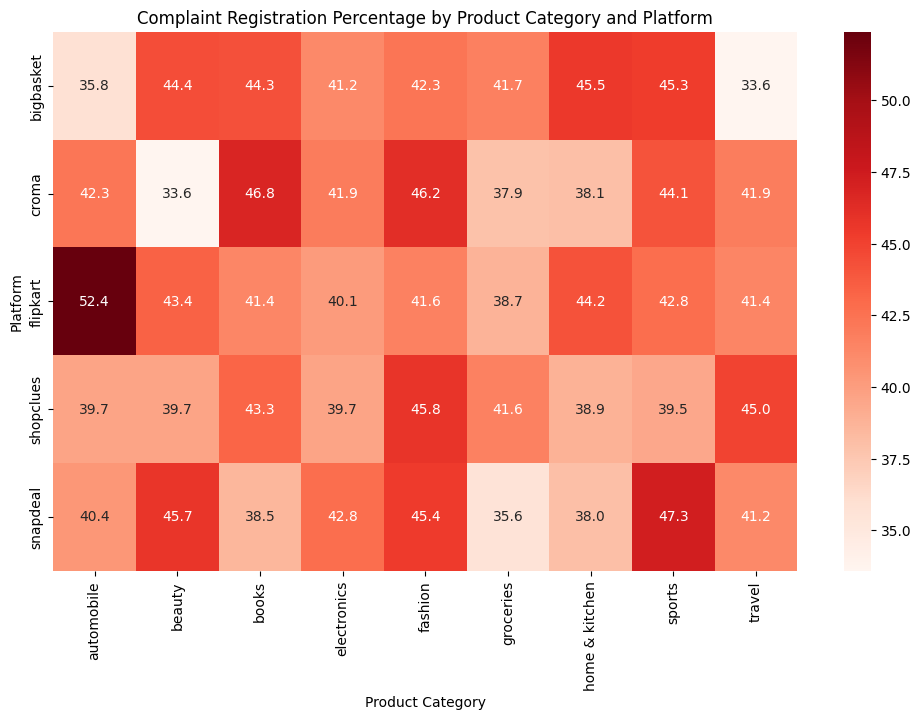

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 5 negative reviews for each top complaint product category on each key platform
sample_reviews = {}
for platform in ['flipkart', 'shopclues', 'croma', 'snapdeal', 'bigbasket']:
    for category in ['automobile', 'fashion', 'books', 'home & kitchen', 'sports']:
        reviews = df[
            (df['platform'] == platform) &
            (df['product_category'] == category) &
            (df['sentiment'] == 'negative')
        ]['review_text'].head(5)
        sample_reviews[(platform, category)] = reviews.tolist()

# Print sample negative reviews
for key, reviews in sample_reviews.items():
    platform, category = key
    print(f"\n--- {platform.title()} | {category.title()} ---")
    for idx, text in enumerate(reviews, 1):
        print(f"{idx}. {text}")

# Visualize complaint registration percentage by product category and platform
complaint_pivot = complaints_by_category.unstack()
plt.figure(figsize=(12, 7))
sns.heatmap(complaint_pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Complaint Registration Percentage by Product Category and Platform")
plt.xlabel("Product Category")
plt.ylabel("Platform")
plt.show()

In [ ]:
# Sample 5 positive reviews for top complaint product categories per key platform
sample_positive_reviews = {}
for platform in ['flipkart', 'shopclues', 'croma', 'snapdeal', 'bigbasket']:
    for category in ['automobile', 'fashion', 'books', 'home & kitchen', 'sports']:
        reviews = df[
            (df['platform'] == platform) &
            (df['product_category'] == category) &
            (df['sentiment'] == 'positive')
        ]['review_text'].head(5)
        sample_positive_reviews[(platform, category)] = reviews.tolist()

# Print sample positive reviews
for key, reviews in sample_positive_reviews.items():
    platform, category = key
    print(f"\n--- {platform.title()} | {category.title()} ---")
    for idx, text in enumerate(reviews, 1):
        print(f"{idx}. {text}")


--- Flipkart | Automobile ---
1. amazing experience, highly recommend!
2. fast delivery and great packaging.
3. great value for money.
4. amazing experience, highly recommend!
5. amazing experience, highly recommend!

--- Flipkart | Fashion ---
1. fast delivery and great packaging.
2. very satisfied with the quality.
3. amazing experience, highly recommend!
4. amazing experience, highly recommend!
5. excellent product! exceeded expectations.

--- Flipkart | Books ---
1. fast delivery and great packaging.
2. excellent product! exceeded expectations.
3. amazing experience, highly recommend!
4. great value for money.
5. very satisfied with the quality.

--- Flipkart | Home & Kitchen ---
1. fast delivery and great packaging.
2. great value for money.
3. very satisfied with the quality.
4. great value for money.
5. amazing experience, highly recommend!

--- Flipkart | Sports ---
1. fast delivery and great packaging.
2. excellent product! exceeded expectations.
3. excellent product! exceede

In [ ]:
import pandas as pd

# Most common phrases in positive and negative reviews
from collections import Counter

def most_common_phrases(reviews, top_n=5):
    phrases = [review.lower() for review in reviews if isinstance(review, str)]
    counts = Counter(phrases)
    return counts.most_common(top_n)

# Gather all positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['review_text']
negative_reviews = df[df['sentiment'] == 'negative']['review_text']

# List the most common phrases
print("Most common positive review phrases:", most_common_phrases(positive_reviews, 7))
print("Most common negative review phrases:", most_common_phrases(negative_reviews, 7))

# Prepare an executive summary
summary = """
Key Findings:
1. Top complaint reasons: Poor product quality, product malfunction, late delivery, poor packaging, unhelpful customer service, 'not worth the price'.
2. Positive reviews focus on: excellent product quality, fast delivery, great packaging, outstanding value, and strong recommendations.
3. Product categories like 'automobile', 'fashion', 'books', and 'sports' have the most frequent complaints across major platforms.

Recommendations:
- Prioritize product quality and durability improvements for high-complaint categories.
- Enhance packaging and speed of delivery on platforms with repeated logistics issues.
- Strengthen customer service support for product categories with recurring service dissatisfaction.
- Spotlight strengths in marketing: emphasize value for money, quick delivery, and product quality in advertising.
"""

print(summary)

Most common positive review phrases: [('amazing experience, highly recommend!', 2109), ('very satisfied with the quality.', 1980), ('great value for money.', 1971), ('excellent product! exceeded expectations.', 1970), ('fast delivery and great packaging.', 1948)]
Most common negative review phrases: [('late delivery and poor packaging.', 2044), ('not worth the price.', 2026), ('customer service was unhelpful.', 2007), ('very disappointed with the quality.', 1952), ('product stopped working after few days.', 1908)]

Key Findings:
1. Top complaint reasons: Poor product quality, product malfunction, late delivery, poor packaging, unhelpful customer service, 'not worth the price'.
2. Positive reviews focus on: excellent product quality, fast delivery, great packaging, outstanding value, and strong recommendations.
3. Product categories like 'automobile', 'fashion', 'books', and 'sports' have the most frequent complaints across major platforms.

Recommendations:
- Prioritize product quality

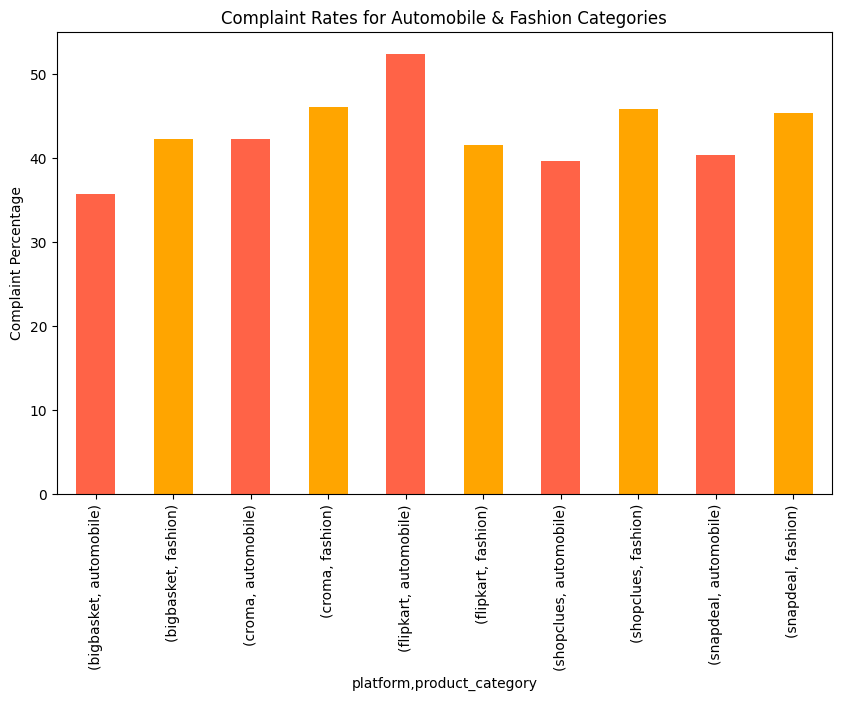

In [ ]:
import matplotlib.pyplot as plt

# Example: Bar chart for complaint percentages in 'automobile' and 'fashion'
complaint_rates = complaints_by_category.loc[:, ['automobile', 'fashion']]
complaint_rates.plot(kind='bar', figsize=(10,6), color=['tomato', 'orange'])
plt.ylabel('Complaint Percentage')
plt.title('Complaint Rates for Automobile & Fashion Categories')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [ ]:
# Prepare features and target
# Drop rows where 'complaint_registered' is NaN, as the model cannot handle them
df_clean = df.dropna(subset=['complaint_registered'])

X = df_clean['review_text']
y = df_clean['complaint_registered'].map({'yes': 1, 'no': 0})

In [ ]:
# Text vectorization
vectorizer = TfidfVectorizer(max_features=500)
X_vec = vectorizer.fit_transform(X)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)



In [ ]:
# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Complaint Prediction Performance:")
print(classification_report(y_test, y_pred))

Complaint Prediction Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3003
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Use TF-IDF vectors generated above
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_vec)

# Print top words in each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {idx+1}: {', '.join(top_words)}")

Topic 1: special, decent, fine, working, few, after, days, stopped, is, product
Topic 2: product, delivery, and, packaging, great, experience, fast, highly, amazing, recommend
Topic 3: about, neutral, great, for, money, value, the, not, price, worth
Topic 4: overall, delivery, and, packaging, was, service, customer, unhelpful, late, poor
Topic 5: product, excellent, exceeded, expectations, disappointed, satisfied, the, quality, very, with


In [ ]:
print(df.groupby('age_group')['complaint_registered'].value_counts(normalize=True).unstack())
print(df.groupby('region')['sentiment'].value_counts(normalize=True).unstack())

complaint_registered        no       yes
age_group                               
18-25                 0.605010  0.394990
26-35                 0.598063  0.401937
36-45                 0.602103  0.397897
46-60                 0.599130  0.400870
60+                   0.608239  0.391761
sentiment  negative   neutral  positive
region                                 
central    0.383945  0.209203  0.406852
east       0.400720  0.197960  0.401320
north      0.395325  0.200685  0.403990
south      0.393469  0.212465  0.394066
west       0.413501  0.196812  0.389687


In [ ]:
# Check for duplicated review texts across train and test sets
train_reviews = set(X_train.indices)
test_reviews = set(X_test.indices)
overlap = train_reviews & test_reviews
print(f"Number of duplicated reviews between train and test: {len(overlap)}")

Number of duplicated reviews between train and test: 51


In [ ]:
train_texts = set(df.iloc[X_train.indices]['review_text'])
test_texts = set(df.iloc[X_test.indices]['review_text'])
duplicate_texts = train_texts & test_texts
print(f"Duplicated review texts between train and test: {len(duplicate_texts)}")

Duplicated review texts between train and test: 13


In [ ]:
# Basic check for direct leakage phrases
leakage_terms = ['complaint', 'resolved', 'registered']
leakage_found = sum(df['review_text'].str.lower().str.contains('|'.join(leakage_terms)))
print(f"Reviews potentially leaking complaint label: {leakage_found}")

Reviews potentially leaking complaint label: 0


In [ ]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X_vec, y, cv=5)
print(f"Cross-validation accuracies: {cv_acc}")
print(f"Mean CV accuracy: {cv_acc.mean():.3f}")

Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.000


In [ ]:
# Assuming you already have X_train and X_test as TF-IDF matrices
# To extract the original indices if you used a split
train_indices = X_train.nonzero()[0]
test_indices = X_test.nonzero()[0]

train_texts = set(df.iloc[train_indices]['review_text'])
test_texts = set(df.iloc[test_indices]['review_text'])
duplicate_texts = train_texts & test_texts
print(f"Duplicated review texts between train and test: {len(duplicate_texts)}")

Duplicated review texts between train and test: 15


In [ ]:
leakage_terms = ['complaint', 'resolved', 'registered']
leakage_found = sum(df['review_text'].str.lower().str.contains('|'.join(leakage_terms)))
print(f"Reviews potentially leaking complaint label: {leakage_found}")

Reviews potentially leaking complaint label: 0


In [ ]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X_vec, y, cv=5)
print(f"Cross-validation accuracies: {cv_acc}")
print(f"Mean CV accuracy: {cv_acc.mean():.3f}")

Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.000
